Tujuan : membuat model untuk dilakukan klasifikasi respons dalam kampanye pemasaran

## Import library

In [ ]:
pip install openpyxl

In [ ]:
pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

## Memuat Data

In [ ]:
df = pd.read_excel("marketing_campaign.xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Lakukan fit kolom untuk masing-masing type data

In [ ]:
cat_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1',
            'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'Complain', 'Response']

num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome',
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

timestamp = ["Dt_Customer"]

## EDA

### Data Cleansing

1. Menangani Data Duplikat

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [ ]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


2. Menangani Missing Value (Nilai Kosong/Hilang)

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Terlihat bahwa kolom Income memiliki mising value sebanyak 24, maka disini kita akan menanganinya dengan cara 'Imputation menggunakan Median' dari kolom tersebut

In [ ]:
# Mengganti missing value dengan median dari kolom "Income"
median_value = df['Income'].median()
df['Income'].fillna(median_value, inplace=True)

In [ ]:
# Memeriksa kembali jumlah missing value
print(df['Income'])

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64


In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

3. Mengecek dan Isi Outlier

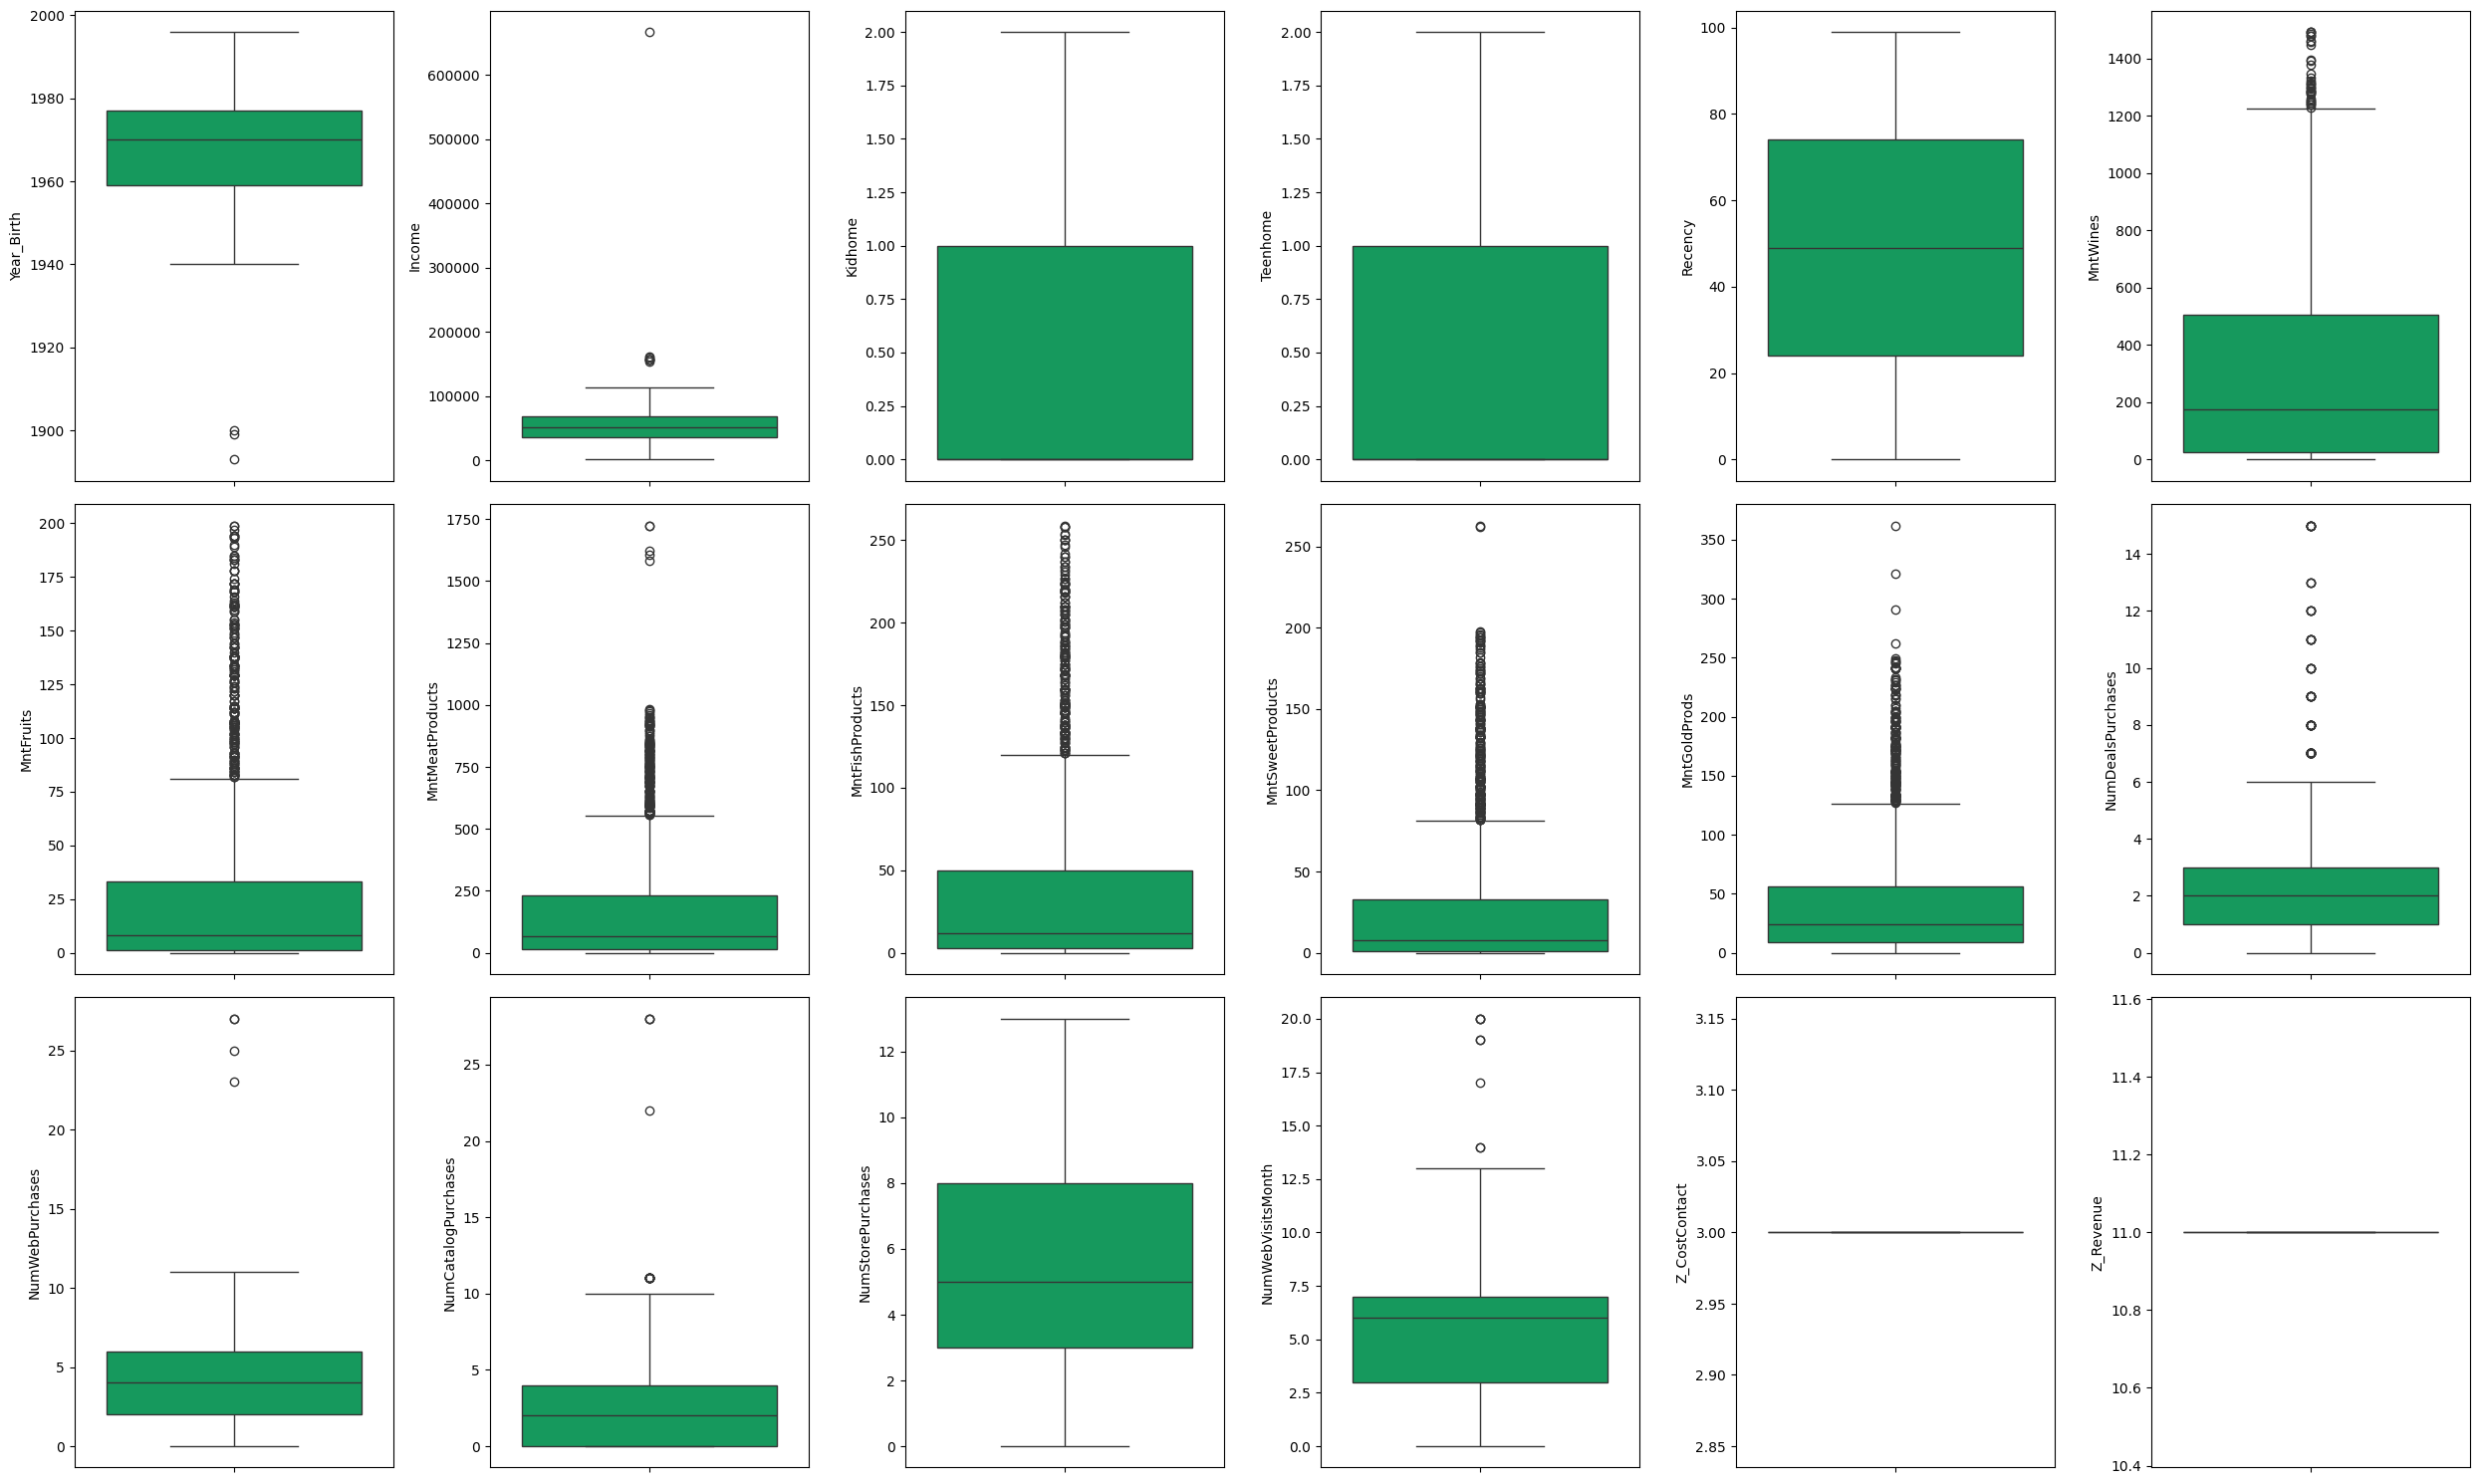

In [ ]:
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.boxplot(y=df[num_cols[i]], color='#00af5f', orient='v')
    plt.tight_layout()

In [ ]:
print(f'Jumlah baris: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(df))
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()
pd.DataFrame({
    "Column Name":num_cols,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 2240
Outlier All Data : 706
Not Outlier All Data : 1534



,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Year_Birth,True,1932.00,2004.00,3,2237
1,Income,True,-13587.75,117416.25,8,2232
2,Kidhome,False,-1.50,2.50,0,2240
3,Teenhome,False,-1.50,2.50,0,2240
4,Recency,False,-51.00,149.00,0,2240
5,MntWines,True,-697.00,1225.00,35,2205
6,MntFruits,True,-47.00,81.00,227,2013
7,MntMeatProducts,True,-308.00,556.00,175,2065
8,MntFishProducts,True,-67.50,120.50,223,2017
9,MntSweetProducts,True,-47.00,81.00,248,1992


mengisi outlier pada variabel dimana outlier terjauh dengan menggunakan median dan yang tidak memiliki outlier di isi dengan rata-ratanya.

In [ ]:
median_kolom = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumWebVisitsMonth']
mean_kolom = ['Kidhome','Teenhome','Recency','NumStorePurchases']

for kolom in median_kolom:
    df[kolom] = df[kolom].fillna(df[kolom].median())

for kolom in mean_kolom:
    df[kolom] = df[kolom].fillna(df[kolom].mean())

4. Melihat nilai corelasi matriks dengan headmap

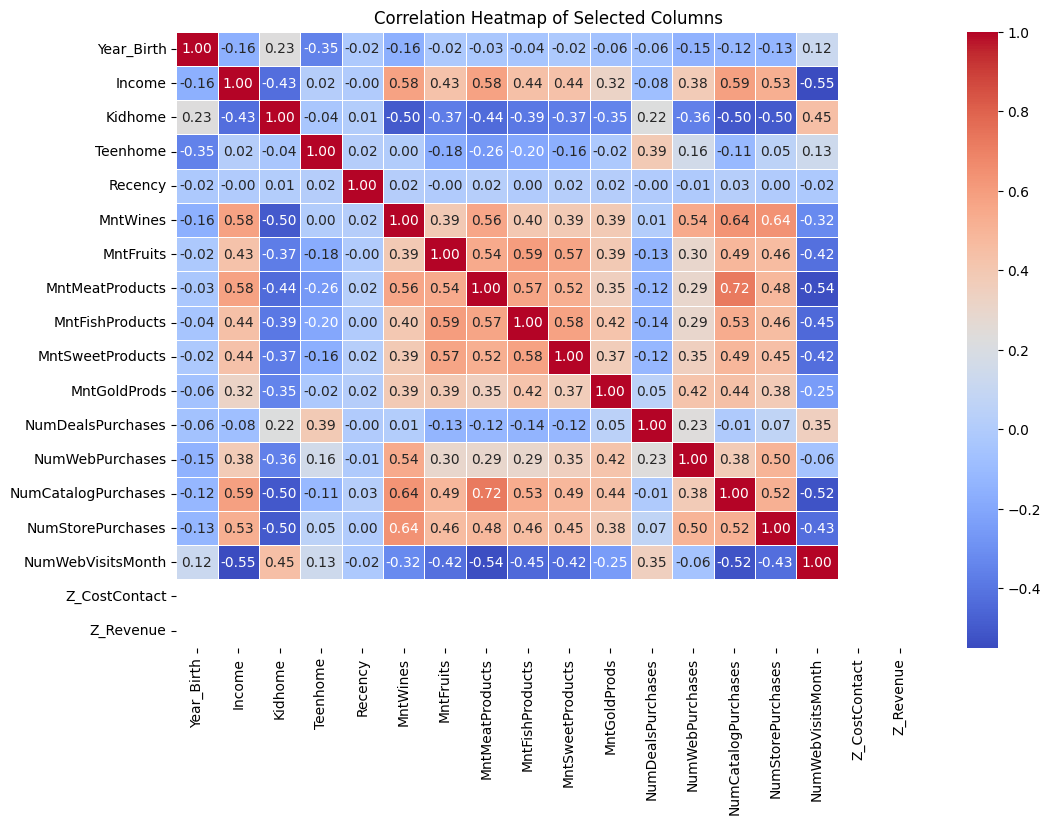

In [ ]:
# menghitung korelasi
corr_matrix = df[num_cols].corr()

# membuat headmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

In [ ]:
num = df.select_dtypes(include=np.number)
numcorr = num.corr()

In [ ]:
Num = numcorr['Response'].sort_values(ascending=False).to_frame()
cm = sns.light_palette("lightgreen", as_cmap=True)
korelasi = Num.style.background_gradient(cmap=cm)
korelasi

,Response
Response,1.000000
AcceptedCmp5,0.326634
AcceptedCmp1,0.293982
AcceptedCmp3,0.254258
MntWines,0.247254
MntMeatProducts,0.236335
NumCatalogPurchases,0.220810
AcceptedCmp4,0.177019
AcceptedCmp2,0.169293
NumWebPurchases,0.148730


features dengan korelasi positif tertinggi adalah AcceptedCmp5 dengan correlation : 0.32

sedangkan dengan korelasi negatif (strong) yakni Recency: -0.19

untuk Z_CostContact dan Z_Revenue memiliki nilai corelasi nan artinya nanti tidaka akan digunakan dalam variabel independent

### Data Preparation

1. Identifikasi kolom Numberikal

In [ ]:
num_cols=list(df._get_numeric_data().columns)
num_cols

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

2. Identifikasi kolom Categorikal

In [ ]:
cat_cols = df.select_dtypes(include='object')
cat_cols

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [ ]:
cat_cols.describe()

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


3. Encode Data

In [ ]:
# mengubah kolom Dt_Customer tanggal menjadi tipe data tanggal dan membaginya menjadi tiga kolom terpisah
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year)
df['Month_Customer'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Day_Customer'] = df['Dt_Customer'].apply(lambda x: x.day)
df = df.drop('Dt_Customer', axis=1)

In [ ]:
#encode kolom categorical ke numerik
le=LabelEncoder()
label=le.fit_transform(df['Education'])
label
df.drop('Education',axis=1)
df['Education']=label

In [ ]:
#encode kolom categorical ke numerik
label1=le.fit_transform(df['Marital_Status'])
df.drop('Marital_Status',axis=1)
df['Marital_Status']=label1
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Day_Customer
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,0,0,0,0,3,11,1,2012,9,4
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,0,0,0,0,3,11,0,2014,3,8
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,0,0,0,0,3,11,0,2013,8,21
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,0,0,0,0,3,11,0,2014,2,10
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,0,0,0,0,3,11,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,46,709,43,...,0,0,0,0,3,11,0,2013,6,13
2236,4001,1946,4,5,64014.0,2,1,56,406,0,...,0,1,0,0,3,11,0,2014,6,10
2237,7270,1981,2,2,56981.0,0,0,91,908,48,...,0,0,0,0,3,11,0,2014,1,25
2238,8235,1956,3,5,69245.0,0,1,8,428,30,...,0,0,0,0,3,11,0,2014,1,24


## Trains dan Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# dependent
y=df['Response']
# independent
x=df.drop(['ID','Response','Z_CostContact','Z_Revenue'],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Modelling Klasifikasi SVM

In [ ]:
#SVM model
svc_model=svm.SVC(kernel='linear')
svc_final=svc_model.fit(x_train,y_train)
print(svc_final.score(x_train,y_train))

0.85546875


## Hasil Klasifikasi dan Evaluasi

**Confusion Matrix**



In [ ]:
# Menghitung confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)

# Mencetak confusion matrix
print("Confusion Matrix:")
print(cm1)

Confusion Matrix:
[[368  11]
 [ 59  10]]


- True Negative (TN): 368 (Negatif benar)
- False Positive (FP): 11 (Positif salah)
- False Negative (FN): 59 (Negatif salah)
- True Positive (TP): 10 (Positif benar)

**Matriks Presisi**

In [ ]:
y_pred1=svc_model.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       379
           1       0.48      0.14      0.22        69

    accuracy                           0.84       448
   macro avg       0.67      0.56      0.57       448
weighted avg       0.80      0.84      0.81       448



**Precision** = nilai precision untuk kelas 0 (non-respon) adalah 0,86 yang artinya model akurat dapat mengidentifikasi sekitar 86% dari data kelas 0 sebagai benar negatif (non-response). Sedangkan nilai precision untuk kelas 1 (response) adalah 0.53, yang berarti model hanya mengidentifikasi 53% dari data kelas 1 sebagai benar positif (response)

**Recall** = Nilai recall untuk kelas 0 adalah 0.98, yang berarti model dapat menemukan 98% dari seluruh data kelas 0 yang ada. Namun, nilai recall untuk kelas 1 hanya 0.14, yang berarti model hanya dapat menemukan 14% dari data kelas 1 secara keseluruhan

**F1-Score** = Nilai F1-score untuk kelas 0 adalah 0.92, yang merupakan rata-rata harmonik antara precision dan recall untuk kelas 0. F1-score untuk kelas 1 adalah 0.23, yang merupakan rata-rata harmonik antara precision dan recall untuk kelas 1

**Accuracy** = Nilai akurasi dari model SVM adalah 0.85, yang berarti model secara keseluruhan dapat memprediksi dengan benar sekitar 85% dari data dalam data uji

Dari hasil diatas, diperoleh bahwa hasil klasifikasi dari model SVM memiliki tingkat recall yang rendah untuk kelas 1 (response), yang menunjukkan bahwa model cenderung kurang efektif dalam mengidentifikasi pelanggan yang akan merespons tawaran dalam kampanye pemasaran.